In [1]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [42]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','Qsb_tavg']


ds_imd = xr.open_mfdataset(f'DATA_p/LIS/{model[1]}/{model[1]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds_imdc = xr.open_mfdataset(f'DATA_p/LIS/{model[5]}/{model[5]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})


data = ['IMD','IMD caliberated']
df = pd.DataFrame(columns=data,index=var)
df = df.apply(pd.to_numeric, errors='coerce')


for i, vr in enumerate(var):

    plt.style.use(['science','no-latex','bright'])

    #df.iloc[i,0] = ds_imd[vr].sel(region='Brahmaputra', season='Monsoon').mean().compute().values 
    #df.iloc[i,1] = ds_imdc[vr].sel(region='Brahmaputra', season='Monsoon').mean().compute().values 
        
    df.iloc[i,0] = ds_imd[vr].isel(region=8, season=1).mean().compute().values 
    df.iloc[i,1] = ds_imdc[vr].isel(region=8, season=1).mean().compute().values 
        

C:\Users\sstar\AppData\Local\Temp\ipykernel_27820\44012639.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
C:\Users\sstar\AppData\Local\Temp\ipykernel_27820\44012639.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


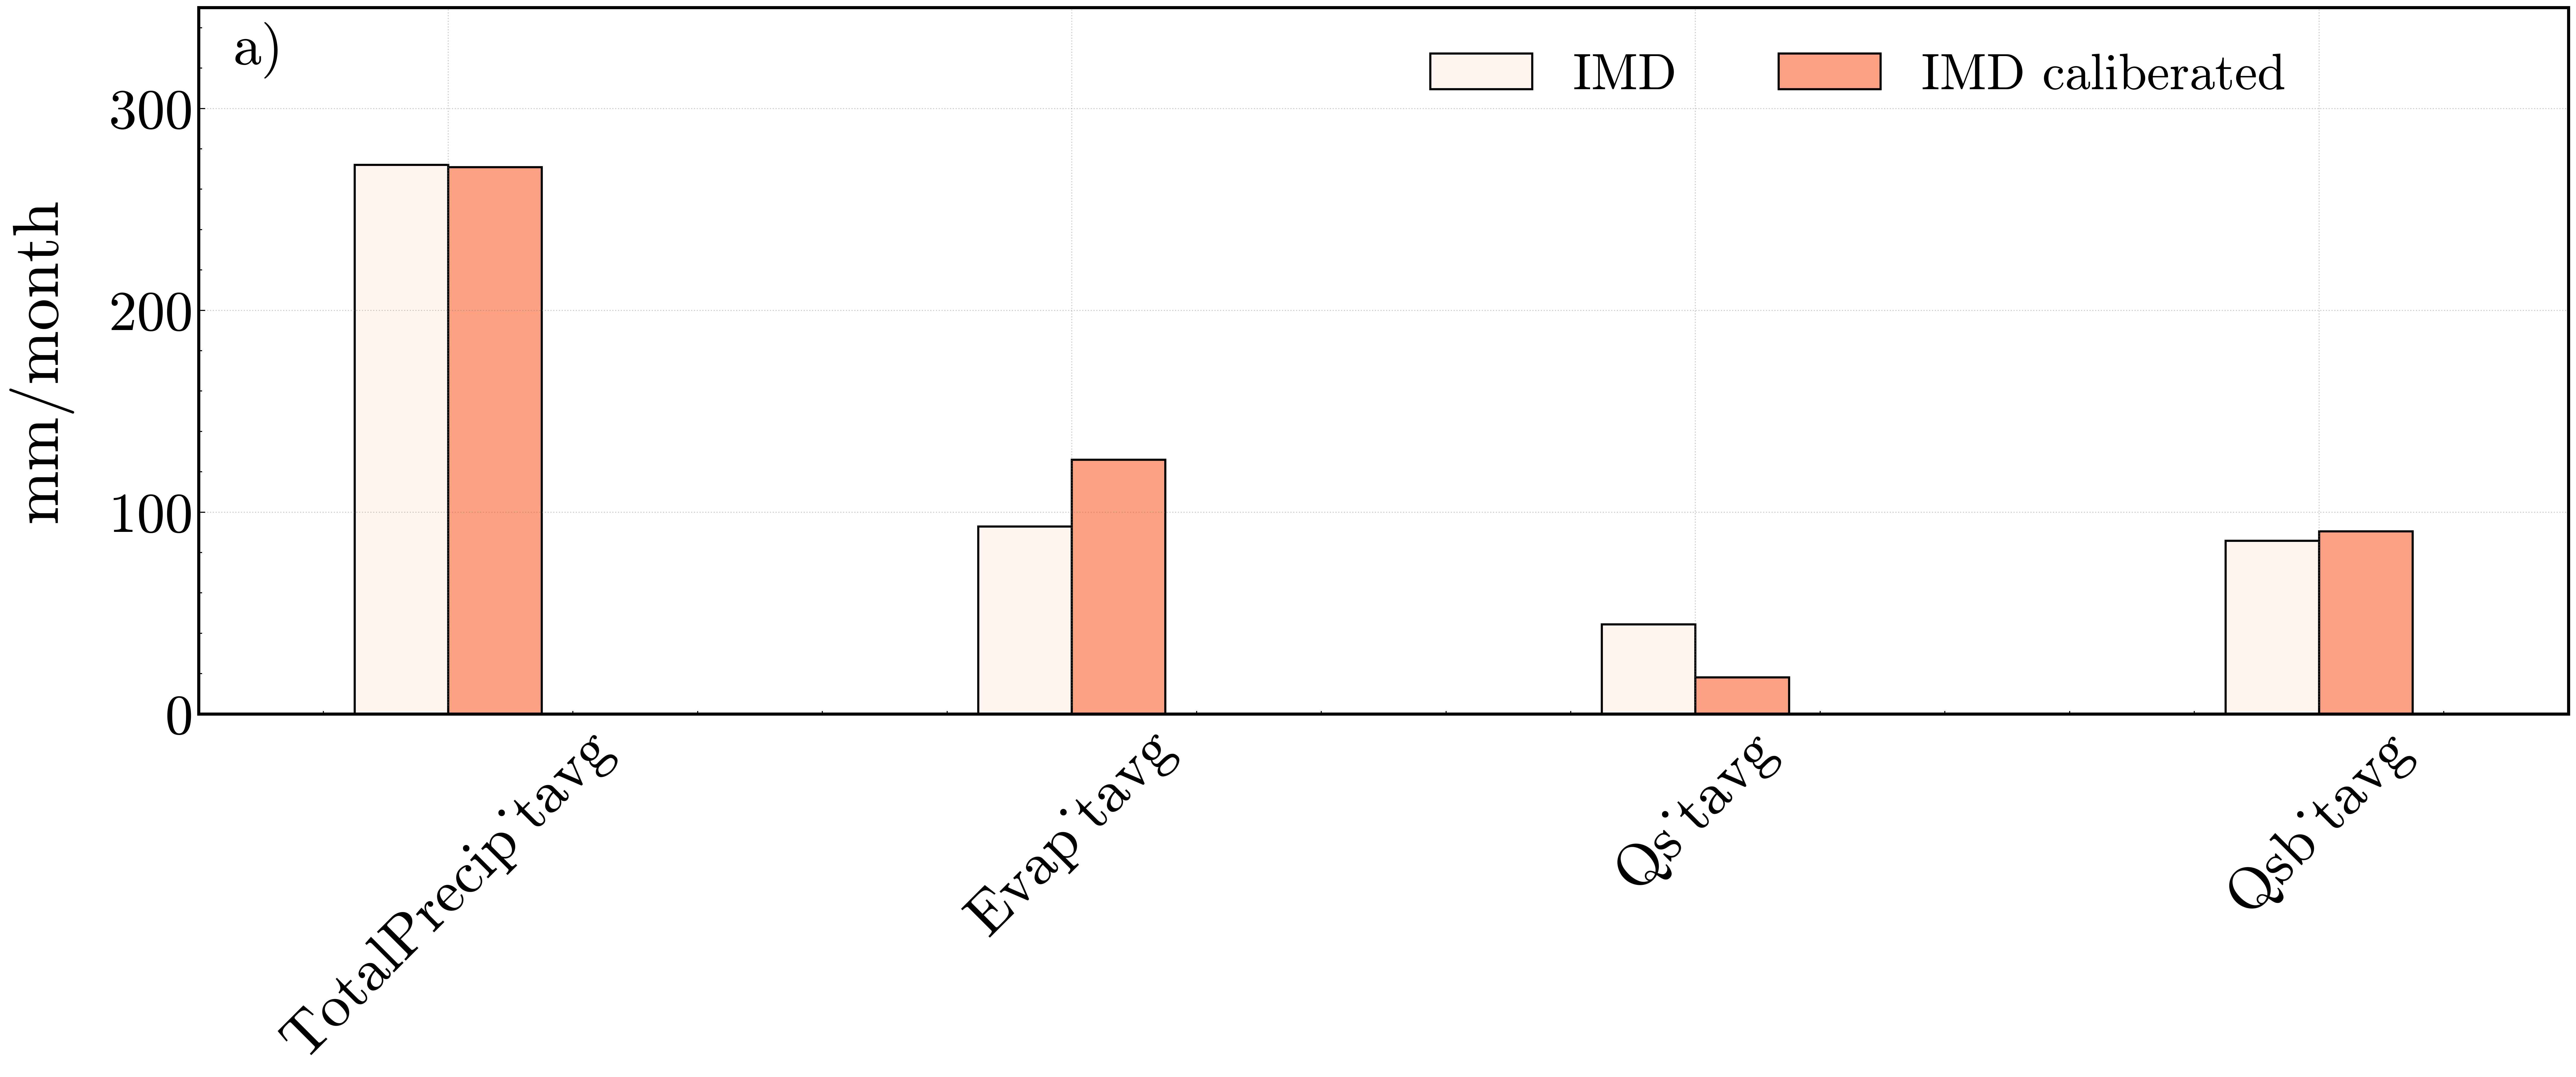

In [43]:

#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(20,6),nrows=1,gridspec_kw={'hspace': 0.05},dpi=600)  # Increased size


cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(4)] 

df.plot.bar(rot=45, ax=ax,color= colors,width=0.3,edgecolor='black')
[x.set_linewidth(1.45) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax.set_ylim(0,350)
ax.text(0.025, 0.94,'a)',fontsize=26.6,color='black',weight='bold',transform=ax.transAxes,ha='center', va='center')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
#ax[1].set_xlabel('Basins',fontsize=31)
ax.set_ylabel('mm/month',fontsize=30.5,labelpad=17)



ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=26.5) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelbottom=True,labelsize=28)

ax.legend(loc='upper right', bbox_to_anchor=(0.90, 1),title_fontsize=30,ncol=4,fontsize=24)

plt.tight_layout()
plt.savefig('2_RE analysis/2_Factors/Outputs/Brahmacheck.jpeg',dpi=600)

In [51]:
mdl=1
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','Qsb_tavg']

lsm = xr.open_mfdataset(f"DATA_p/{model[mdl]}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm=lsm[var]
#lsm=lsm.drop_vars('spatial_ref')
lsm=lsm*60*60*24*30 

lsm=lsm["TotalPrecip_tavg"]

mdl=4
lsm_c = xr.open_mfdataset(f"DATA_p/{model[mdl]}_1980_2021.nc",engine='netcdf4', parallel=True,chunks={'time': 'auto'})
lsm_c=lsm_c[var]
#lsm=lsm.drop_vars('spatial_ref')
lsm_c=lsm_c*60*60*24*30 
lsm_c=lsm_c["TotalPrecip_tavg"]


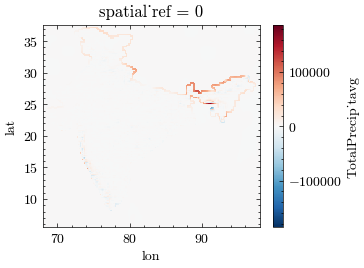

In [59]:
P=lsm.compute()-lsm_c.compute()
P.sum(dim='time').plot()

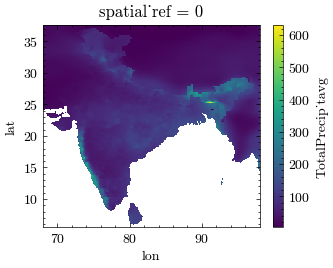

C:\Users\sstar\AppData\Local\Temp\ipykernel_27820\2607158158.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
C:\Users\sstar\AppData\Local\Temp\ipykernel_27820\2607158158.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


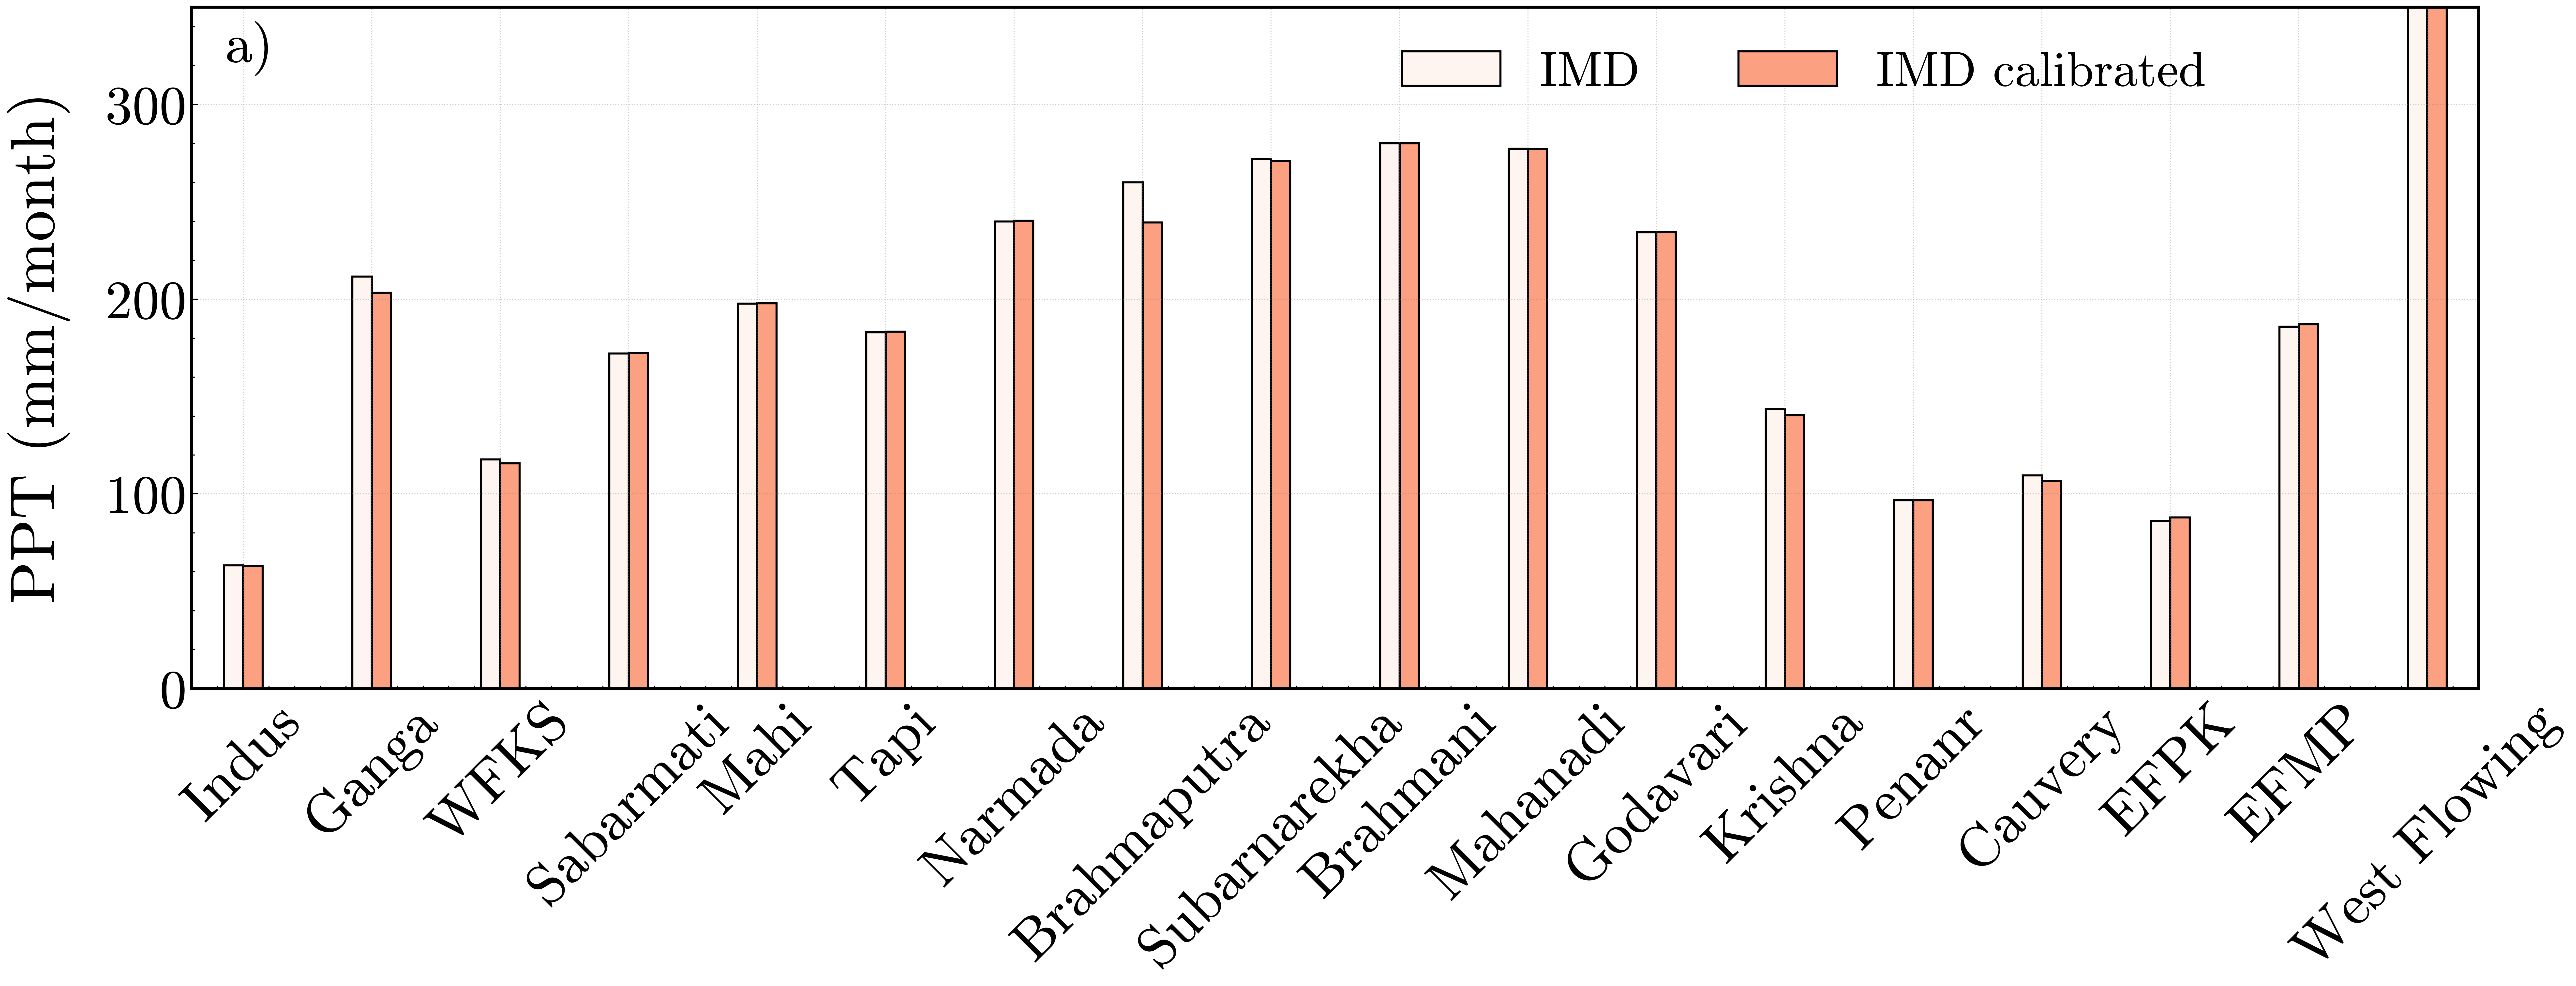

In [49]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','Qsb_tavg']


ds_imd = xr.open_mfdataset(f'DATA_p/LIS/{model[1]}/{model[1]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
ds_imdc = xr.open_mfdataset(f'DATA_p/LIS/{model[5]}/{model[5]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_imd.region.values

data = ['IMD','IMD calibrated']
df = pd.DataFrame(columns=data,index=basin)
df = df.apply(pd.to_numeric, errors='coerce')


for i, reg in enumerate(basin):

    plt.style.use(['science','no-latex','bright'])

    #df.iloc[i,0] = ds_imd[vr].sel(region='Brahmaputra', season='Monsoon').mean().compute().values 
    #df.iloc[i,1] = ds_imdc[vr].sel(region='Brahmaputra', season='Monsoon').mean().compute().values 
        
    df.iloc[i,0] = ds_imd['TotalPrecip_tavg'].isel(region=i, season=1).mean().compute().values 
    df.iloc[i,1] = ds_imdc['TotalPrecip_tavg'].isel(region=i, season=1).mean().compute().values 


#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(20,6),nrows=1,gridspec_kw={'hspace': 0.05},dpi=600)  # Increased size


cmap = plt.cm.get_cmap('Reds', 4)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(4)] 

df.plot.bar(rot=45, ax=ax,color= colors,width=0.3,edgecolor='black')
[x.set_linewidth(1.45) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')
ax.set_ylim(0,350)
ax.text(0.025, 0.94,'a)',fontsize=26.6,color='black',weight='bold',transform=ax.transAxes,ha='center', va='center')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
#ax[1].set_xlabel('Basins',fontsize=31)
ax.set_ylabel('PPT (mm/month)',fontsize=30.5,labelpad=17)



ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=26.5) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelbottom=True,labelsize=28)

ax.legend(loc='upper right', bbox_to_anchor=(0.90, 1),title_fontsize=30,ncol=4,fontsize=24)

plt.tight_layout()
    

In [46]:
df

,IMD,IMD caliberated
Indus,63.245773,62.955334
Ganga,211.640900,203.344054
WFKS,117.756485,115.645735
Sabarmati,172.198517,172.367902
Mahi,197.759903,197.848117
Tapi,182.988113,183.369976
Narmada,239.899979,240.324621
Brahmaputra,259.964294,239.447698
Subarnarekha,272.069244,270.970449
Brahmani,280.095856,280.146145
